In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [29]:
iris_data= pd.read_csv('https://raw.githubusercontent.com/awar667/AIR_project/master/Iris_Data.csv')

In [30]:
iris_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 1.a Number of Irises per Species (Labels 0, 1, and 2)

In [31]:
lab_0 = iris_data.apply(lambda x: True if x['Labels'] == 0 else False , axis=1)
numOf0 = len(lab_0[lab_0==True].index)
print('Number of Species of label 0: ', numOf0)

Number of Species of label 0:  50


In [32]:
lab_1 = iris_data.apply(lambda x: True if x['Labels'] == 1 else False , axis=1)
numOf1 = len(lab_1[lab_1==True].index)
print('Number of Species of label 1: ', numOf1)

Number of Species of label 1:  50


In [33]:
lab_2 = iris_data.apply(lambda x: True if x['Labels'] == 2 else False , axis=1)
numOf2 = len(lab_2[lab_2==True].index)
print('Number of Species of label 2: ', numOf2)

Number of Species of label 2:  50


## 1.b Plotting 

In [41]:
iris_data.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Labels']

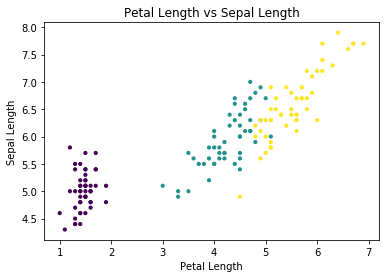

In [46]:
plt.scatter(iris_data.Petal_Length,iris_data.Sepal_Length, s=10, c = iris_data.Labels)
plt.title('Petal Length vs Sepal Length')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.show()

### Results: There is a high, positive correlation between petal length and sepal length. The three species can be most reliably distinguished by their petal lengths, as there is significantly less overlap between the ranges of their respective petal lengths than the ranges of their respective sepal lengths. Species 0 has a particularly distinct range of pedal lengths compared to the other two. 

In [50]:
X = iris_data[['Petal_Length','Petal_Width','Sepal_Width']].values
y = iris_data['Sepal_Length'].values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [52]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
desc = pd.DataFrame(reg.coef_, ['Petal_Length','Petal_Width','Sepal_Width'], columns=['Coef'])
desc

,Coef
Petal_Length,0.828885
Petal_Width,-0.844081
Sepal_Width,0.649416


## 1.d Results: The high, positive coefficient returned for petal length after linear regression matches what we would expect from the scatter plot generated earlier. A greater petal length is thus a reliable predictor for a greater sepal length. However, the regression model suggests that it is not as good of a sepal length predictor as the petal width, which has a slightly higher magnitude of correlation with sepal length, although the correlation is negative for petal width. Both petal length and width are significantly better predictors of sepal length than sepal width, which is still a moderately reliable predictor. 

## 1.e Extra Credit

In [59]:
X = iris_data[['Petal_Length','Petal_Width','Sepal_Width','Labels']].values
y = iris_data['Sepal_Length'].values

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [61]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
desc2 = pd.DataFrame(reg.coef_, ['Petal_Length','Petal_Width','Sepal_Width', 'Labels'], columns=['Coef'])
desc2

,Coef
Petal_Length,0.692566
Petal_Width,-0.491673
Sepal_Width,0.705396
Labels,0.002018
